<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/MiniProject/miniproject_angel_duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATABASE UPLOAD
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy.linalg import norm
import matplotlib.pyplot as plt

data_ = 'drive/MyDrive/MLF_FILES/Data_prepared_final.csv'



In [ ]:
loaded_data = np.array(pd.read_csv(data_))

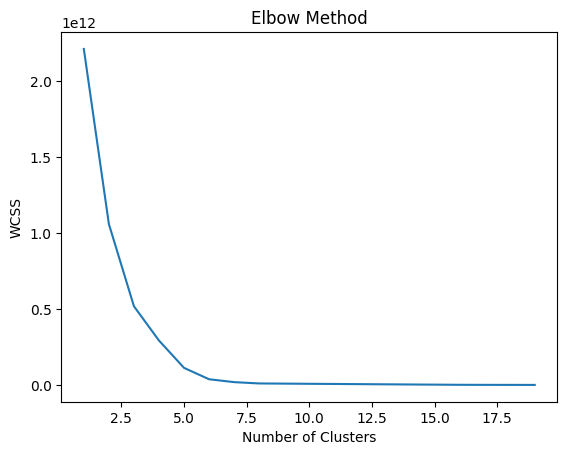

In [ ]:

from sklearn.cluster import KMeans

data = loaded_data

# Initialize a list to store WCSS values for different k
wcss = []

# Try different values of k (number of clusters)
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(loaded_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


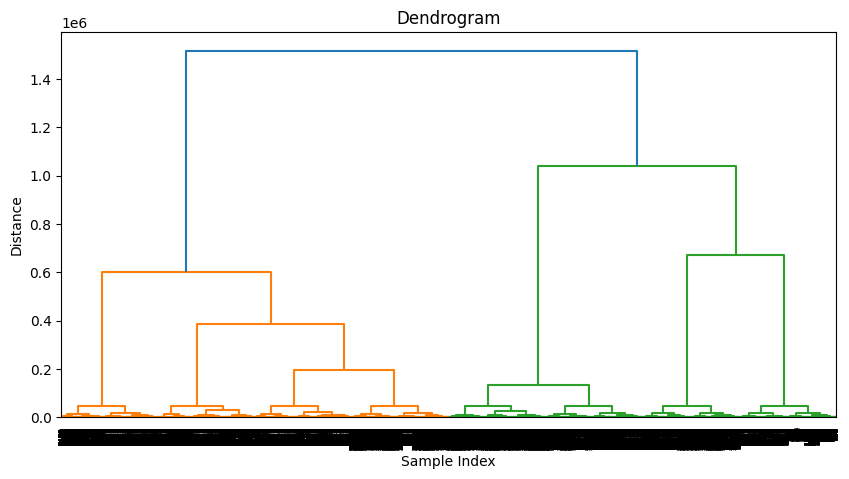

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import pandas as pd


# Calculate pairwise distances
distances = pdist(loaded_data)

# Perform hierarchical clustering
Z = hierarchy.linkage(distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
print(f"""{loaded_data[0]}
 {loaded_data[1]}
  {loaded_data[2]}""")

[ 0.00000000e+00  4.51815240e+04 -4.14000000e+02 -4.21076324e+02
  7.60965943e-02 -4.69875984e+01 -2.72196312e+01  1.04361877e-01
  1.12977779e+00  4.40299451e-01  2.05993533e+00]
 [ 1.00000000e+00  4.51821290e+04 -4.14000000e+02 -4.23571686e+02
  6.98794797e-02 -4.78526268e+01 -2.69349670e+01  5.31576537e-02
  1.05000997e+00  4.31240499e-01  1.81505251e+00]
  [ 2.00000000e+00  4.51825500e+04 -4.14000000e+02 -4.21033936e+02
  6.14661947e-02 -4.89686966e+01 -2.71307220e+01 -4.59125303e-02
  9.89473283e-01  4.47789669e-01  1.76205266e+00]


In [ ]:
k = 6

In [ ]:
def init_clusters(data :np.array, k_points :int) -> np.array:
  d_index = np.random.choice(data.shape[0], size=k_points, replace = False)

  k_choice = data[d_index, :]

  return k_choice

k_init = init_clusters(loaded_data, k)

In [ ]:
pd.DataFrame(k_init.round(2))

,0,1,2,3,4,5,6,7,8,9,10
0,19055.0,54174.45,234.0,236.77,0.06,-35.42,-28.12,1.91,1.11,1.40,2.33
1,5018.0,69840.37,-306.0,-314.42,-0.04,-29.44,-38.69,-3.86,1.55,3.48,4.27
2,14207.0,39651.62,-522.0,-531.98,0.11,-35.27,-29.56,1.83,1.15,1.45,2.44
3,11661.0,60463.30,-504.0,-258.88,-0.01,-30.48,-36.66,-3.43,1.15,2.58,3.21
4,400.0,45381.60,-396.0,-405.61,0.04,-49.28,-27.23,0.27,1.11,0.46,1.94
5,18481.0,53879.06,486.0,462.07,0.05,-34.91,-28.57,2.03,1.13,1.56,2.48


In [ ]:
def dist_calc(points :np.array, clust :np.array) -> np.array:
  dis_ar = []
  for i in clust:
    arr = []
    for j in points:
      ar = np.square(norm(i-j))
      arr.append(ar)
    dis_ar.append(np.asarray(arr))


  return dis_ar

aa_ = dist_calc(loaded_data, k_init)

len(aa_)

6

In [ ]:
def clust_assign(distance :np.array) -> np.array:
  assigned_centroids = np.argmin(distance, axis=0)
  return assigned_centroids

a_clust = clust_assign(aa_)

In [ ]:
a_clust[0:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        wcss += np.sum(distances ** 2)
    return wcss


In [ ]:
def new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
  c_points = np.array([])

  for c_class in range(k_clusters):
    avg = np.array([])
    for index in range(11):
      avg = np.append(avg, np.array([np.average(points[np.where(assigned_centroids == c_class),index])]))

    c_points = np.append(c_points, avg)



  return np.resize(c_points, (k, 11))

In [ ]:
test = 1
new_c = new_centroids(loaded_data, a_clust, k)
while test == 1:

  dist1 = dist_calc(loaded_data, new_c)

  a_clust1 = clust_assign(dist1)
  new_c1 = new_centroids(loaded_data, a_clust1, k)

  new_c = np.copy(new_c1)

  new_c =  new_centroids(loaded_data, a_clust1, k)

  if (np.array_equal(new_c, new_c1)) == True:
    break

In [ ]:
new_c

array([[ 1.84810000e+04,  5.38803649e+04,  3.86755741e+02,
         3.86935254e+02,  6.56810742e-02, -3.48859263e+01,
        -2.83650795e+01,  2.01947167e+00,  1.07970740e+00,
         1.52105681e+00,  2.39820387e+00],
       [ 5.99950000e+03,  7.03256679e+04, -3.75120000e+02,
        -3.74941860e+02, -3.98032406e-02, -2.95632843e+01,
        -3.78013535e+01, -3.80168555e+00,  1.53923118e+00,
         3.53511827e+00,  4.27446601e+00],
       [ 1.31995000e+04,  3.91587688e+04, -3.88687500e+02,
        -3.89520708e+02,  7.61979015e-02, -3.83621282e+01,
        -3.00089521e+01,  1.34157840e+00,  1.17467936e+00,
         1.11655019e+00,  2.32110109e+00],
       [ 7.59950000e+03,  6.04670573e+04, -6.75652500e+02,
        -6.75510693e+02,  3.50117849e-02, -3.35286638e+01,
        -3.21100508e+01,  1.90637861e-01,  1.24177846e+00,
         1.95859373e+00,  2.93584773e+00],
       [ 1.19950000e+03,  4.57721430e+04, -4.03830000e+02,
        -4.03087311e+02,  6.76783586e-02, -4.60678123e+01,
  

In [ ]:
pd.DataFrame(new_c)

,0,1,2,3,4,5,6,7,8,9,10
0,18481.0,53880.364944,386.755741,386.935254,0.065681,-34.885926,-28.365080,2.019472,1.079707,1.521057,2.398204
1,5999.5,70325.667896,-375.120000,-374.941860,-0.039803,-29.563284,-37.801353,-3.801686,1.539231,3.535118,4.274466
2,13199.5,39158.768842,-388.687500,-389.520708,0.076198,-38.362128,-30.008952,1.341578,1.174679,1.116550,2.321101
3,7599.5,60467.057326,-675.652500,-675.510693,0.035012,-33.528664,-32.110051,0.190638,1.241778,1.958594,2.935848
4,1199.5,45772.142962,-403.830000,-403.087311,0.067678,-46.067812,-27.171263,0.334424,1.074242,0.516491,1.915083
5,16081.0,54020.542086,-8.890277,-9.402664,0.074303,-32.885452,-29.029404,2.569503,1.214245,1.930782,2.844672


In [ ]:
pd.DataFrame(new_c.round(2))

,0,1,2,3,4,5,6,7,8,9,10
0,18481.0,53880.36,386.76,386.94,0.07,-34.89,-28.37,2.02,1.08,1.52,2.40
1,5999.5,70325.67,-375.12,-374.94,-0.04,-29.56,-37.80,-3.80,1.54,3.54,4.27
2,13199.5,39158.77,-388.69,-389.52,0.08,-38.36,-30.01,1.34,1.17,1.12,2.32
3,7599.5,60467.06,-675.65,-675.51,0.04,-33.53,-32.11,0.19,1.24,1.96,2.94
4,1199.5,45772.14,-403.83,-403.09,0.07,-46.07,-27.17,0.33,1.07,0.52,1.92
5,16081.0,54020.54,-8.89,-9.40,0.07,-32.89,-29.03,2.57,1.21,1.93,2.84


In [ ]:
test_2 = 1
new_c_2 = new_centroids(loaded_data, a_clust, k)

while test_2 == 1:

  dist1_2 = dist_calc(loaded_data, new_c_2)

  a_clust1_2 = clust_assign(dist1_2)
  new_c1_2 = new_centroids(loaded_data, a_clust1_2, k)

  new_c_2 = np.copy(new_c1_2)

  new_c_2 =  new_centroids(loaded_data, a_clust1_2, k)
  wcss_1 = calculate_wcss(loaded_data, new_c_2, a_clust)
  wcss_2 = calculate_wcss(loaded_data, new_c1_2, a_clust)
  if (wcss_1 == wcss_2):
    break


array([[ 1.84810000e+04,  5.38803649e+04,  3.86755741e+02,
         3.86935254e+02,  6.56810742e-02, -3.48859263e+01,
        -2.83650795e+01,  2.01947167e+00,  1.07970740e+00,
         1.52105681e+00,  2.39820387e+00],
       [ 5.99950000e+03,  7.03256679e+04, -3.75120000e+02,
        -3.74941860e+02, -3.98032406e-02, -2.95632843e+01,
        -3.78013535e+01, -3.80168555e+00,  1.53923118e+00,
         3.53511827e+00,  4.27446601e+00],
       [ 1.31995000e+04,  3.91587688e+04, -3.88687500e+02,
        -3.89520708e+02,  7.61979015e-02, -3.83621282e+01,
        -3.00089521e+01,  1.34157840e+00,  1.17467936e+00,
         1.11655019e+00,  2.32110109e+00],
       [ 7.59950000e+03,  6.04670573e+04, -6.75652500e+02,
        -6.75510693e+02,  3.50117849e-02, -3.35286638e+01,
        -3.21100508e+01,  1.90637861e-01,  1.24177846e+00,
         1.95859373e+00,  2.93584773e+00],
       [ 1.19950000e+03,  4.57721430e+04, -4.03830000e+02,
        -4.03087311e+02,  6.76783586e-02, -4.60678123e+01,
  

In [ ]:
pd.DataFrame(new_c_2.round(2))

,0,1,2,3,4,5,6,7,8,9,10
0,18481.0,53880.36,386.76,386.94,0.07,-34.89,-28.37,2.02,1.08,1.52,2.40
1,5999.5,70325.67,-375.12,-374.94,-0.04,-29.56,-37.80,-3.80,1.54,3.54,4.27
2,13199.5,39158.77,-388.69,-389.52,0.08,-38.36,-30.01,1.34,1.17,1.12,2.32
3,7599.5,60467.06,-675.65,-675.51,0.04,-33.53,-32.11,0.19,1.24,1.96,2.94
4,1199.5,45772.14,-403.83,-403.09,0.07,-46.07,-27.17,0.33,1.07,0.52,1.92
5,16081.0,54020.54,-8.89,-9.40,0.07,-32.89,-29.03,2.57,1.21,1.93,2.84
